In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [96]:
data_raw = pd.read_csv("f1_clean.csv")
data_raw.head()

,raceId,race,year,circuit,constructor,driver,qualifyingPos,position,teammate
0,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Ferrari,ALO,3,1,OTHER
1,337,Bahrain Grand Prix,2010,Bahrain International Circuit,McLaren,HAM,4,3,OTHER
2,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Red Bull,VET,1,4,OTHER
3,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Williams,HUL,13,14,OTHER
4,338,Australian Grand Prix,2010,Albert Park Grand Prix Circuit,Ferrari,ALO,3,4,OTHER


Remove unused columns

In [97]:
data_train = data_raw[["year", "circuit", "constructor", "driver", "qualifyingPos", "teammate", "position"]]
data_train

,year,circuit,constructor,driver,qualifyingPos,teammate,position
0,2010,Bahrain International Circuit,Ferrari,ALO,3,OTHER,1
1,2010,Bahrain International Circuit,McLaren,HAM,4,OTHER,3
2,2010,Bahrain International Circuit,Red Bull,VET,1,OTHER,4
3,2010,Bahrain International Circuit,Williams,HUL,13,OTHER,14
4,2010,Albert Park Grand Prix Circuit,Ferrari,ALO,3,OTHER,4
...,...,...,...,...,...,...,...
2733,2023,Autódromo Hermanos Rodríguez,Alfa Romeo,BOT,9,ZHO,15
2734,2023,Autódromo Hermanos Rodríguez,Aston Martin,STR,0,ALO,17
2735,2023,Autódromo Hermanos Rodríguez,Aston Martin,ALO,13,STR,0
2736,2023,Autódromo Hermanos Rodríguez,Haas F1 Team,MAG,16,HUL,0


## Create a model using all the data

Separate data from 2023 as this will be used to validate model performance.

Apply One Hot Encoding to the following categorical columns:
- constructor
- driver
- circuit
- teammate

In [98]:
one_hot_encoded_data = pd.get_dummies(data_train, columns = ['circuit', 'constructor', 'driver', 'teammate'])
one_hot_encoded_data

,year,qualifyingPos,position,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
0,2010,3,1,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2010,4,3,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2010,1,4,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,13,14,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2010,3,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,9,15,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2734,2023,0,17,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2735,2023,13,0,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2736,2023,16,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
def standard_scaler_scale(data):
    return (data - data.mean()) / data.std()

def standard_scaler_unscale(data, mean, std):
    return data * std + mean

Use StandardScaler to scale qualifyingPos to -1, 1

In [100]:
data_train_scaled = one_hot_encoded_data.copy()
data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
data_train_scaled.position = standard_scaler_scale(one_hot_encoded_data.position)

data_train_scaled

,year,qualifyingPos,position,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
0,2010,-1.056312,-1.067674,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2010,-0.875109,-0.682244,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2010,-1.418718,-0.489530,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,0.755719,1.437619,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2010,-1.056312,-0.489530,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,0.030906,1.630334,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2734,2023,-1.599921,2.015764,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2735,2023,0.755719,-1.260389,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2736,2023,1.299328,-1.260389,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
train_set = data_train_scaled[data_train_scaled.year != 2023]
test_set = data_train_scaled[data_train_scaled.year == 2023]

In [102]:
X_train = train_set.drop(['position', 'year'],axis = 1)
X_train

,qualifyingPos,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,circuit_Circuit Gilles Villeneuve,circuit_Circuit de Barcelona-Catalunya,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
0,-1.056312,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.875109,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.418718,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.755719,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.056312,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,1.480531,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2458,1.661734,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2459,1.299328,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2460,-0.693906,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [103]:
y_train = train_set['position']
y_train

0      -1.067674
1      -0.682244
2      -0.489530
3       1.437619
4      -0.489530
          ...   
2457    1.437619
2458    1.630334
2459    2.015764
2460    2.208479
2461   -1.260389
Name: position, Length: 2462, dtype: float64

0.044612668289131886


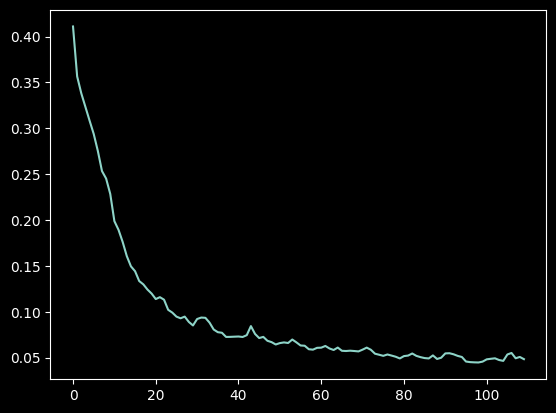

In [119]:
# model 
regr = MLPRegressor(
    hidden_layer_sizes=(500, 250, 100, 50), 
    max_iter=500,
    random_state=203043043
    ).fit(X_train, y_train)

plt.plot(regr.loss_curve_)
print(regr.best_loss_)

Use 2023 data to test model performance

In [120]:
X_test = test_set.drop(['position', 'year'],axis = 1)
X_test

,qualifyingPos,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,circuit_Circuit Gilles Villeneuve,circuit_Circuit de Barcelona-Catalunya,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
2462,-1.418718,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2463,-1.237515,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2464,-0.693906,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2465,-0.875109,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2466,-0.331500,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,0.030906,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2734,-1.599921,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2735,0.755719,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2736,1.299328,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
y_test = test_set.position

(array([ 1., 22., 27., 17., 19., 19., 20., 18., 20., 17., 14., 18., 14.,
         9., 14.,  8., 10.,  5.,  2.,  2.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 20 artists>)

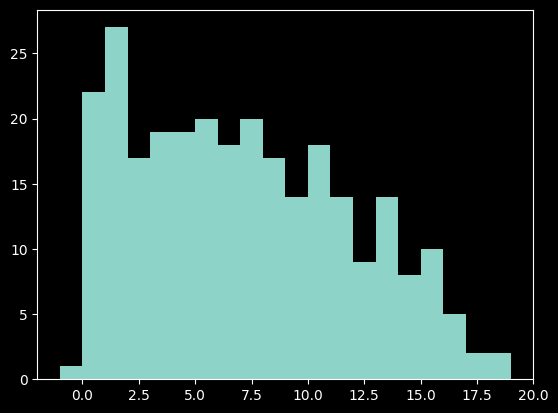

In [129]:
pred = regr.predict(X_test)
# resid = abs(y_test - pred)

pred_unscaled = standard_scaler_unscale(pred, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
y_test_unscaled = standard_scaler_unscale(y_test, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
plt.hist(pred_unscaled, bins = 20)
# plt.hist(y_test_unscaled, bins = 20)
# plt.hist((pred_unscaled - y_test_unscaled), bins = 30)

In [114]:
this_season = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]
this_season

,year,qualifyingPos,position,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
2462,2023,1,1,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2463,2023,2,2,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2464,2023,5,3,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2465,2023,4,4,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2466,2023,7,5,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,9,15,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2734,2023,0,17,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2735,2023,13,0,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2736,2023,16,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [115]:
one_hot_testing = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]
one_hot_testing

,year,qualifyingPos,position,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
2462,2023,1,1,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2463,2023,2,2,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2464,2023,5,3,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2465,2023,4,4,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2466,2023,7,5,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,9,15,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2734,2023,0,17,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2735,2023,13,0,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2736,2023,16,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [116]:
X_test = one_hot_testing.drop('position',axis = 1)
X_test

,year,qualifyingPos,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,circuit_Circuit Gilles Villeneuve,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
2462,2023,1,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2463,2023,2,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2464,2023,5,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2465,2023,4,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2466,2023,7,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,9,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2734,2023,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2735,2023,13,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2736,2023,16,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [117]:
y_test = one_hot_testing['position']
y_test

2462     1
2463     2
2464     3
2465     4
2466     5
        ..
2733    15
2734    17
2735     0
2736     0
2737     0
Name: position, Length: 276, dtype: int64

In [118]:
regr.predict(X_test[:20])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- year


## Create model for each circuit

In [ ]:
# get all the unique circuit values
current_circuits = data.loc[data['year'] == 2023].circuit.unique()
current_circuits

array(['Bahrain International Circuit', 'Jeddah Corniche Circuit',
       'Albert Park Grand Prix Circuit', 'Baku City Circuit',
       'Circuit de Monaco', 'Circuit de Barcelona-Catalunya',
       'Circuit Gilles Villeneuve', 'Red Bull Ring',
       'Silverstone Circuit', 'Hungaroring',
       'Circuit de Spa-Francorchamps', 'Autodromo Nazionale di Monza',
       'Marina Bay Street Circuit', 'Suzuka Circuit',
       'Circuit of the Americas', 'Autódromo Hermanos Rodríguez'],
      dtype=object)

In [ ]:
for circuit in current_circuits: 
    circuit_data = data.loc[data['circuit'] == circuit]

    # one hot encode the categorical variables
    one_hot_encoded_data = pd.get_dummies(circuit_data, columns = ['race', 'circuit', 'constructor', 'driver', 'teammate'])

    # split the data into previous seasons for training and current season for testing 
    one_hot_training = one_hot_encoded_data.loc[one_hot_encoded_data['year'] != 2023]
    one_hot_testing = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]
    
    # get the training and testing data
    X_train = one_hot_training.drop('position',axis = 1)
    y_train = one_hot_training['position']

    X_test = one_hot_testing.drop('position',axis = 1)
    y_test = one_hot_testing['position']

    # create the model
    regr = MLPRegressor(hidden_layer_sizes=(500,),random_state=1, max_iter=1000).fit(X_train, y_train)


    print(circuit)
    print(y_test[:20])
    print(regr.predict(X_test[:20]))

    



Bahrain International Circuit
2462     1
2463     2
2464     3
2465     4
2466     5
2467     6
2468     7
2469     8
2470     9
2471    10
2472    11
2473    13
2474    15
2475    16
2476    17
2477    30
2478    30
Name: position, dtype: int64
[25.07903975 25.15169919 25.22349015 24.99772907 25.24999075 25.24188272
 25.19396253 25.17496588 25.64822967 25.58165751 25.38169759 25.4402136
 25.51725534 25.29012406 25.32454966 25.16226497 24.89682962]
Jeddah Corniche Circuit
2479     1
2480     2
2481     3
2482     4
2483     5
2484     6
2485     7
2486     8
2487     9
2488    10
2489    11
2490    12
2491    13
2492    17
2493    18
2494    30
2495    30
Name: position, dtype: int64
[13.76314556 13.84518428 13.82121394 13.80334929 13.81086909 13.73589143
 13.79297731 13.91378454 13.95904225 14.02197827 13.91943824 14.01176196
 13.82336247 14.10411079 14.00128187 14.17473007 14.00806506]
Albert Park Grand Prix Circuit
2496     1
2497     2
2498     3
2499     4
2500     5
2501     6
25